In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [37]:
folder = 'data/'
data = pd.read_csv(folder+'driving_log.csv',index_col=False)

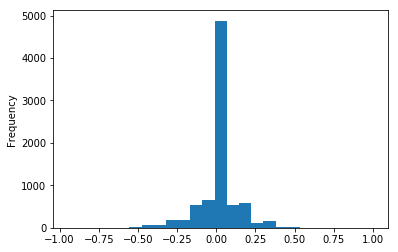

In [9]:
data['steering'].plot.hist(bins=25)

In [10]:
data['steering'].describe()
len(data.loc[data['steering'] == 0.0])

4361

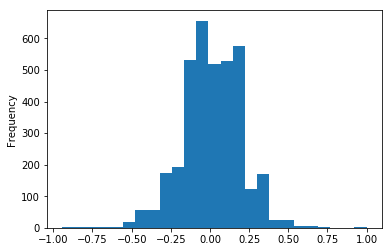

In [11]:
data.loc[data['steering'] != 0.0]['steering'].plot.hist(bins=25)

In [31]:
def random_image(data):
    cameras = ['center','left','right']
    camera = random.choice(cameras)
    size = len(data)
    image_path = data.iloc[random.randint(0,size)]
    return image_path

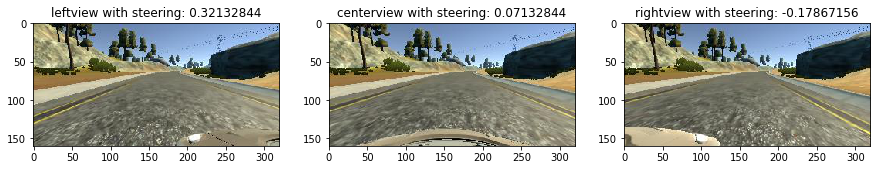

In [35]:
path = random_image(data)
cameras = ['left','center','right']
offset = [0.25, 0, -0.25]
plt.subplots(1,3,figsize=(15,15))
for i in range(3):
    plt.subplot(1,3,i+1)
    camera = cameras[i]
    imagepath = folder +path[camera].strip()
    plt.imshow(plt.imread(imagepath))
    plt.title(camera+'view with steering: '+str(path['steering']+offset[i]))
plt.show()

In [42]:
def image_translation(image, steering):
    '''
    Translation function provided by Vivek Yadav
    to augment the steering angles and images randomly
    and avoid overfitting
    '''
    rows, cols, _ = image.shape
    trans_range = 100
    tr_x = trans_range*np.random.uniform()-trans_range/2
    steering = steering + tr_x/trans_range*2*.2
#     tr_y = 40*np.random.uniform()-40/2
    tr_y = 0
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    return image, steering

Image translation example

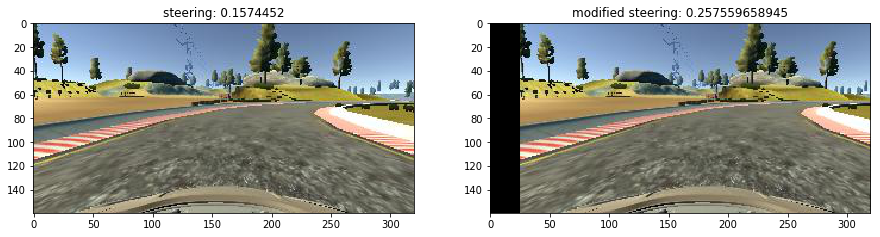

In [49]:
path = random_image(data)
img = plt.imread(folder + path['center'].strip())
steering = path['steering']
plt.subplots(1,2,figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('steering: '+ str(steering))
image, steering = image_translation(img, steering)
plt.subplot(1,2,2)
plt.imshow(image)
plt.title('modified steering: '+str(steering))
plt.show()

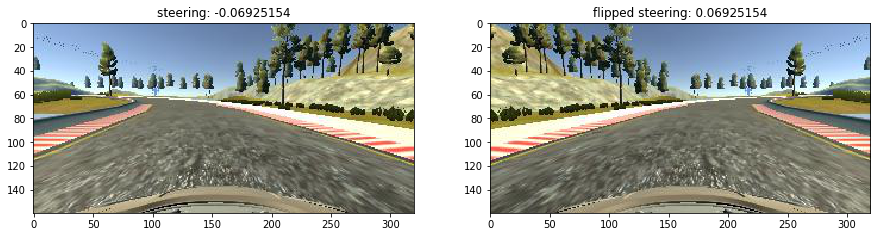

In [50]:
import numpy as np
path = random_image(data)
img = plt.imread(folder + path['center'].strip())
steering = path['steering']
plt.subplots(1,2,figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('steering: '+ str(steering))
image = np.fliplr(img)
steering = -steering
plt.subplot(1,2,2)
plt.imshow(image)
plt.title('flipped steering: '+str(steering))
plt.show()

In [55]:
def crop_image1(img, c_height=66, c_width=200):
        '''
        crop image
        '''
        image_array = img[60:135, :]
        cropped = cv2.resize(image_array, (200, 66),interpolation=cv2.INTER_AREA)
        return cropped
def crop_image2(img, c_height=66, c_width=200):
        '''
        crop image
        '''
        height,width = img.shape[0], img.shape[1]
        y_s, x_s = 60, int(width/2) - int(c_width/2)
        image_array = img[y_s:y_s+c_height, x_s:x_s+c_width]
        return image_array

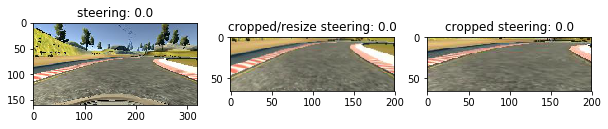

In [61]:
path = random_image(data)
img = plt.imread(folder + path['center'].strip())
steering = path['steering']
plt.subplots(1,3,figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('steering: '+ str(steering))
image = crop_image1(img)
plt.subplot(1,3,2)
plt.imshow(image)
plt.title('cropped/resize steering: '+str(steering))
image = crop_image2(img)
plt.subplot(1,3,3)
plt.imshow(image)
plt.title('cropped steering: '+str(steering))
plt.show()